# Advertising Project

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')

## Veriyi Analiz Etme

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr(numeric_only = False)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns

<Axes: >

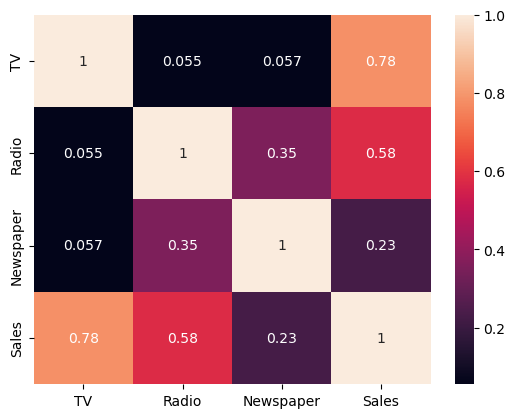

In [9]:
sns.heatmap(df.corr(numeric_only= True),annot = True )

## Egitim ve Test Datasi Hazirlama

In [14]:
x= df[['TV','Radio','Newspaper']]

In [16]:
y = df[['Sales']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size= 0.20, random_state = 42)

## Model Egitimi

In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [32]:
from sklearn.metrics import r2_score , mean_squared_error

In [33]:
R = Ridge()

In [34]:
L = Lasso()

In [35]:
E = ElasticNet()

In [41]:
### Model Train

In [36]:
Rmodel = R.fit(x_train , y_train)

In [37]:
Lmodel = L.fit(x_train , y_train)

In [38]:
Emodel = E.fit(x_train , y_train)

In [42]:
### Predict

In [39]:
predictR = Rmodel.predict(x_test)

In [40]:
r2_score(y_test,predictR)

0.89943810463304

In [43]:
predictL = Lmodel.predict(x_test)

In [44]:
r2_score(y_test , predictL)

0.9004013443377963

In [46]:
predictE = Emodel.predict(x_test)

In [47]:
r2_score(y_test , predictE)

0.8999611908219934

In [48]:
### Complex Function

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [54]:
algo_test(x, y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.983391,0.724047,0.612189
XGBRegressor,0.972470,0.932165,0.725829
KNeighborsRegressor,0.961638,1.100387,0.948760
Extra Tree,0.937515,1.404368,1.017500
SVR,0.934851,1.433997,0.968690
AdaBoost,0.933719,1.446396,0.980000
Decision Tree,0.929634,1.490302,1.010000
Linear,0.899438,1.781600,1.460757
Ridge,0.889218,1.869940,1.525709
SGD,0.884135,1.912356,1.544016
